In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(1)
np.random.seed(1)

In [2]:
url='https://raw.githubusercontent.com/nzxtdata/Multivariate-Financial-Time-Series-Forecasting-with-Machine-Learning/main/SPXfundamental.csv'
df1 = pd.read_csv(url, parse_dates= True)
df=df1.copy()
df.Date = pd.to_datetime(df.Date)
df.set_index("Date", inplace=True)
df = df[df.index.year <= 2020]
df=df.asfreq('b')
df=df.fillna(method='ffill')

In [3]:
df.shape

(4634, 10)

In [5]:
df['returns'] = df.spxclose.pct_change(1).mul(100)
df = df.iloc[2:]

In [6]:
df.tail()

,spxopen,spxhigh,spxlow,spxclose,spxvolume,US_treasury_yield,OPEC/ORB - Value,us_gdp_qoq,us_unemployment_ra_%,us_longterm_ir_%,returns
Date,,,,,,,,,,,
2020-12-25,3694.030029,3703.820068,3689.320068,3703.060059,1.885090e+09,0.12,40.65,-2.848345,8.800000,0.650000,0.000000
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3.527460e+09,0.12,40.65,-2.848345,8.800000,0.650000,0.872253
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3.387030e+09,0.12,40.65,-2.848345,8.800000,0.650000,-0.222738
2020-12-30,3736.189941,3744.629883,3730.209961,3732.040039,3.145200e+09,0.12,40.65,-2.848345,8.800000,0.650000,0.134155
2020-12-31,3733.270020,3760.199951,3726.879883,3756.070068,3.172510e+09,0.09,50.24,-2.386694,6.766667,0.863333,0.643885


In [7]:
df.describe()

,spxopen,spxhigh,spxlow,spxclose,spxvolume,US_treasury_yield,OPEC/ORB - Value,us_gdp_qoq,us_unemployment_ra_%,us_longterm_ir_%,returns
count,4632.000000,4632.000000,4632.000000,4632.000000,4.632000e+03,4632.000000,4632.000000,4632.000000,4632.000000,4632.000000,4632.000000
mean,1739.777877,1749.271045,1729.642984,1740.137130,3.508057e+09,1.275816,65.298715,1.764534,6.278526,3.010775,0.038936
std,693.526196,695.932133,690.581997,693.456089,1.383824e+09,1.569398,27.608590,2.147769,2.039990,1.125838,1.187188
min,679.280029,695.270020,666.789978,676.530029,3.560700e+08,0.040000,22.610000,-9.032775,3.600000,0.650000,-11.984055
25%,1198.757507,1205.907532,1191.474976,1199.337494,2.698880e+09,0.120000,45.630000,1.425725,4.633333,2.263333,-0.370722
50%,1437.825012,1445.484985,1430.535034,1438.150024,3.472910e+09,0.500000,58.790000,2.183861,5.433333,2.736667,0.046985
75%,2130.660095,2142.762390,2124.712524,2131.777527,4.155602e+09,1.640000,90.700000,3.119473,7.800000,4.020000,0.526407
max,3750.010010,3760.199951,3730.209961,3756.070068,1.145623e+10,5.170000,136.030000,4.326363,13.066667,5.070000,11.580037


In [8]:
df.columns

Index(['spxopen', 'spxhigh', 'spxlow', 'spxclose', 'spxvolume',
       'US_treasury_yield', 'OPEC/ORB - Value', 'us_gdp_qoq',
       'us_unemployment_ra_%', 'us_longterm_ir_%', 'returns'],
      dtype='object')

In [9]:
df.shape

(4632, 11)

In [10]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon

    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])

        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [11]:
df.columns

Index(['spxopen', 'spxhigh', 'spxlow', 'spxclose', 'spxvolume',
       'US_treasury_yield', 'OPEC/ORB - Value', 'us_gdp_qoq',
       'us_unemployment_ra_%', 'us_longterm_ir_%', 'returns'],
      dtype='object')

In [12]:
validate = df[['spxopen', 'spxhigh', 'spxlow', 'spxclose', 'spxvolume',
       'US_treasury_yield', 'OPEC/ORB - Value', 'us_gdp_qoq',
       'us_unemployment_ra_%', 'us_longterm_ir_%', 'returns']].tail(20)
df.drop(df.tail(20).index,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
x_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()
dataX = x_scaler.fit_transform(df[['spxopen', 'spxhigh', 'spxlow', 'spxclose', 'spxvolume',
       'US_treasury_yield', 'OPEC/ORB - Value', 'us_gdp_qoq',
       'us_unemployment_ra_%', 'us_longterm_ir_%', 'returns']])
dataY = y_scaler.fit_transform(df[['spxclose']])

In [35]:
df.shape

(4612, 11)

In [40]:
hist_window = 100
horizon = 20
TRAIN_SPLIT = 4000
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)

In [41]:
x_val_multi.shape

(492, 100, 11)

In [20]:
print ('Single window of past history')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])

Single window of past history
[[0.05995315 0.06336486 0.06410222 ... 0.23943662 0.739819   0.6194023 ]
 [0.067454   0.06380671 0.07000114 ... 0.23943662 0.739819   0.48713477]
 [0.0659652  0.06274895 0.06936911 ... 0.23943662 0.739819   0.5201933 ]
 ...
 [0.10412512 0.09945572 0.10711348 ... 0.26760563 0.6719457  0.50925814]
 [0.10417864 0.10212018 0.10830731 ... 0.26760563 0.6719457  0.54742605]
 [0.1072131  0.10310765 0.10985561 ... 0.26760563 0.6719457  0.51965175]]

 Target horizon
[[0.10918703]
 [0.10577513]
 [0.10599235]
 [0.10700153]
 [0.10702158]
 [0.10904334]
 [0.11077099]
 [0.11077099]
 [0.1154427 ]
 [0.11687296]
 [0.11744103]
 [0.1152422 ]
 [0.11866746]
 [0.11583702]
 [0.11174342]
 [0.11358136]
 [0.11431989]
 [0.11304335]
 [0.11789216]
 [0.11677269]]


In [21]:
BATCH_SIZE = 256
BUFFER_SIZE = 150

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [22]:
ED_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=x_train_multi.shape[-2:], return_sequences=True),
    tf.keras.layers.LSTM(units=32,return_sequences=True),
    tf.keras.layers.LSTM(units=15),
    tf.keras.layers.RepeatVector(y_train_multi.shape[1]), 
    tf.keras.layers.LSTM(units=64,return_sequences=True),
    tf.keras.layers.LSTM(units=32,return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=1))
])
ED_lstm_model.compile(optimizer='adam', loss='mse')


In [23]:
model_path = 'Encoder_Decoder_LSTM_Multivariate.h5'

In [24]:
model_path = 'Encoder_Decoder_LSTM_Multivariate.h5'
EVALUATION_INTERVAL = 100
EPOCHS = 100
history = ED_lstm_model.fit(train_data_multi, epochs=EPOCHS,steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi, validation_steps=50,verbose =1,
                              callbacks =[
                                  tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
                                  tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)
                              ]
                           )

Epoch 1/100
100/100 [==============================] - 53s 451ms/step - loss: 0.0409 - val_loss: 0.0776
Epoch 2/100
100/100 [==============================] - 43s 436ms/step - loss: 0.0109 - val_loss: 0.0480
Epoch 3/100
100/100 [==============================] - 43s 432ms/step - loss: 0.0068 - val_loss: 0.0285
Epoch 4/100
100/100 [==============================] - 43s 431ms/step - loss: 0.0088 - val_loss: 0.0370
Epoch 5/100
100/100 [==============================] - 43s 430ms/step - loss: 0.0048 - val_loss: 0.0423
Epoch 6/100
100/100 [==============================] - 43s 434ms/step - loss: 0.0050 - val_loss: 0.0499
Epoch 7/100
100/100 [==============================] - 43s 431ms/step - loss: 0.0039 - val_loss: 0.0557
Epoch 8/100
100/100 [==============================] - 43s 427ms/step - loss: 0.0036 - val_loss: 0.0337
Epoch 9/100
100/100 [==============================] - 43s 430ms/step - loss: 0.0025 - val_loss: 0.0214
Epoch 10/100
100/100 [==============================] - 43s 433m

In [25]:
Trained_model = tf.keras.models.load_model(model_path)

In [26]:
# Show the model architecture
Trained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 64)           19456     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 32)           12416     
_________________________________________________________________
lstm_2 (LSTM)                (None, 15)                2880      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 20, 15)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 20, 64)            20480     
_________________________________________________________________
lstm_4 (LSTM)                (None, 20, 32)            12416     
_________________________________________________________________
time_distributed (TimeDistri (None, 20, 1)             3

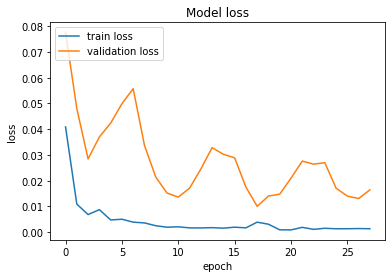

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.rcParams["figure.figsize"] = [20,6]
plt.show()

In [28]:
data_val = x_scaler.fit_transform(df[['spxopen', 'spxhigh', 'spxlow', 'spxclose', 'spxvolume',
       'US_treasury_yield', 'OPEC/ORB - Value', 'us_gdp_qoq',
       'us_unemployment_ra_%', 'us_longterm_ir_%', 'returns']].tail(20))

val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

Predicted_results = Trained_model.predict(val_rescaled)
Predicted_results_Inv_trans = y_scaler.inverse_transform(Predicted_results.reshape(-1,1))

In [29]:
testing = validate[['spxopen', 'spxhigh', 'spxlow', 'spxclose']].copy()
testing['pred'] = Predicted_results_Inv_trans

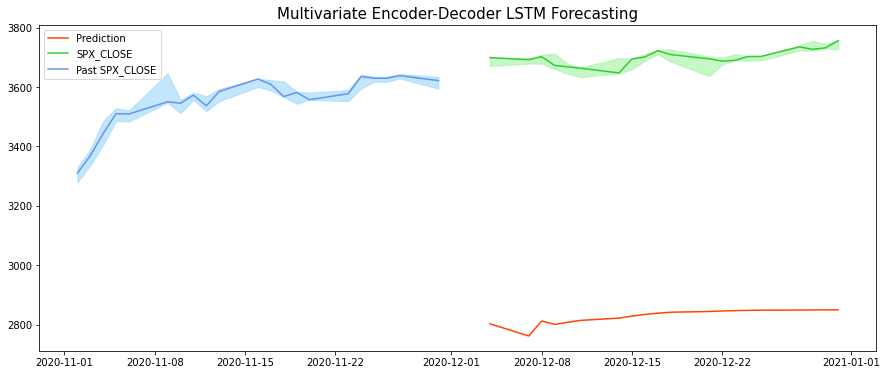

In [30]:
f, ax = plt.subplots(figsize=(15,6))

past = df[(df.index >= "2020-11-01") & (df.index < "2020-12-01")][['spxhigh', 'spxlow', 'spxclose']]
ax.plot(testing[['pred']], color = 'orangered', label='Prediction')
ax.plot(testing[['spxclose']], color = 'limegreen', label='SPX_CLOSE')
ax.plot(past[['spxclose']], color = 'cornflowerblue', label='Past SPX_CLOSE')


# ax.fill_between(test.ds, test.pred_lower, test.pred_upper, color='lightcoral', alpha=0.5)
ax.fill_between(testing.index, testing.spxlow, testing.spxhigh, color='lightgreen', alpha=0.5)
ax.fill_between(past.index, past.spxlow, past.spxhigh, color='lightskyblue', alpha=0.5)

ax.set_title("Multivariate Encoder-Decoder LSTM Forecasting", size = 15)
ax.legend()

plt.show()

In [31]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [33]:
timeseries_evaluation_metrics_func(testing['spxclose'],testing['pred'])

Evaluation metric results:-
MSE is : 757188.3898905546
MAE is : 869.8312377929688
RMSE is : 870.1657255319556
MAPE is : 23.506950183000413
R2 is : -1163.7322837966933



In [34]:
testing

,spxopen,spxhigh,spxlow,spxclose,pred
Date,,,,,
2020-12-04,3670.939941,3699.199951,3670.939941,3699.120117,2803.042480
2020-12-07,3694.729980,3697.409912,3678.879883,3691.959961,2762.254883
2020-12-08,3683.050049,3708.449951,3678.830078,3702.250000,2812.765625
2020-12-09,3705.979980,3712.389893,3660.540039,3672.820068,2801.316162
2020-12-10,3659.129883,3678.489990,3645.179932,3668.100098,2808.141113
2020-12-11,3656.080078,3665.909912,3633.399902,3663.459961,2814.644043
2020-12-14,3675.270020,3697.610107,3645.840088,3647.489990,2822.374756
2020-12-15,3666.409912,3695.290039,3659.620117,3694.620117,2829.123291
2020-12-16,3696.250000,3711.270020,3688.570068,3701.169922,2834.673340


In [43]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [44]:
timeseries_evaluation_metrics_func(testing.spxclose, testing.pred)

Evaluation metric results:-
MSE is : 757188.3898905546
MAE is : 869.8312377929688
RMSE is : 870.1657255319556
MAPE is : 23.506950183000413
R2 is : -1163.7322837966933

